# K均值算法（K-means）聚类

## 【关键词】K个种子，均值

In [ ]:
之前的算法：X_train(数据)----->y_train(目标值): 监督式学习，目标明确
    
K-means无监督，自学    

## 一、K-means算法原理

### 聚类的概念：一种无监督的学习，事先不知道类别，自动将相似的对象归到同一个簇中。

K-Means算法是一种聚类分析（cluster analysis）的算法，其主要是来计算数据聚集的算法，主要通过不断地取离种子点最近均值的算法。

K-Means算法主要解决的问题如下图所示。我们可以看到，在图的左边有一些点，我们用肉眼可以看出来有四个点群，但是我们怎么通过计算机程序找出这几个点群来呢？于是就出现了我们的K-Means算法

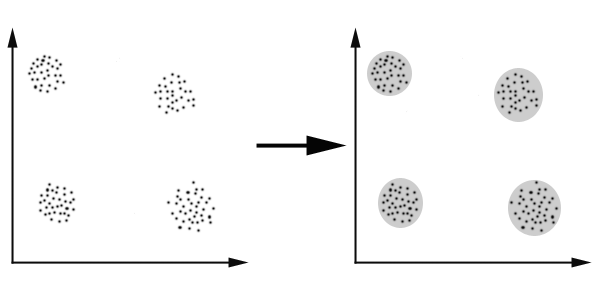

这个算法其实很简单，如下图所示：

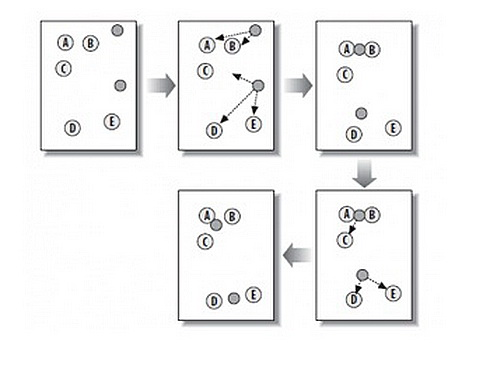

从上图中，我们可以看到，A，B，C，D，E是五个在图中点。而灰色的点是我们的种子点，也就是我们用来找点群的点。有两个种子点，所以K=2。

然后，K-Means的算法如下：

1. 随机在图中取K（这里K=2）个种子点。
2. 然后对图中的所有点求到这K个种子点的距离，假如点Pi离种子点Si最近，那么Pi属于Si点群。（上图中，我们可以看到A，B属于上面的种子点，C，D，E属于下面中部的种子点）
3. 接下来，我们要移动种子点到属于他的“点群”的中心。（见图上的第三步）
4. 然后重复第2）和第3）步，直到，种子点没有移动（我们可以看到图中的第四步上面的种子点聚合了A，B，C，下面的种子点聚合了D，E）。

这个算法很简单，重点说一下“求点群中心的算法”：欧氏距离（Euclidean Distance）：差的平方和的平方根

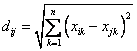


### K-Means主要最重大的缺陷——都和初始值有关：

K是事先给定的，这个K值的选定是非常难以估计的。很多时候，事先并不知道给定的数据集应该分成多少个类别才最合适。（ISODATA算法通过类的自动合并和分裂，得到较为合理的类型数目K）

K-Means算法需要用初始随机种子点来搞，这个随机种子点太重要，不同的随机种子点会有得到完全不同的结果。（K-Means++算法可以用来解决这个问题，其可以有效地选择初始点）

### 总结：K-Means算法步骤：

1. 从数据中选择k个对象作为初始聚类中心;
2. 计算每个聚类对象到聚类中心的距离来划分；
3. 再次计算每个聚类中心
4. 计算标准测度函数，直到达到最大迭代次数，则停止，否则，继续操作。
5. 确定最优的聚类中心

### K-Means算法应用

看到这里，你会说，K-Means算法看来很简单，而且好像就是在玩坐标点，没什么真实用处。而且，这个算法缺陷很多，还不如人工呢。是的，前面的例子只是玩二维坐标点，的确没什么意思。但是你想一下下面的几个问题：

1）如果不是二维的，是多维的，如5维的，那么，就只能用计算机来计算了。

2）二维坐标点的X，Y 坐标，其实是一种向量，是一种数学抽象。现实世界中很多属性是可以抽象成向量的，比如，我们的年龄，我们的喜好，我们的商品，等等，能抽象成向量的目的就是可以让计算机知道某两个属性间的距离。如：我们认为，18岁的人离24岁的人的距离要比离12岁的距离要近，鞋子这个商品离衣服这个商品的距离要比电脑要近，等等。

## 二、实战

重要参数：
- n_clusters：聚类的个数

重要属性：
- cluster_centers_ : [n_clusters, n_features]的数组，表示聚类中心点的坐标
- labels_ : 每个样本点的标签


### 1、聚类实例

导包，使用make_blobs生成随机点cluster_std

In [3]:
import numpy as np
#随机生成点
from sklearn.datasets import make_blobs

#K-means:k均值聚类 cluster(一簇，一类)
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
X_train,y_train = make_blobs(n_samples=150,centers=3,cluster_std=1)

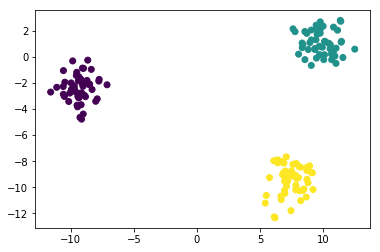

In [7]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

建立模型,训练数据，并进行数据预测，使用相同数据

In [8]:
#Knn ’邻居‘
#Kmeans k == 打算将数据分成积累
kmeans = KMeans(n_clusters=3)

In [9]:
#无监督学习，没有目标，自学成才，根据距离，自动分类
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

无监督的情况下进行计算，预测
现在机器学习没有目标

In [10]:
y_ = kmeans.predict(X_train)

绘制图形，显示聚类结果kmeans.cluster_centers

In [12]:
y_

array([2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 0,
       2, 2, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1,
       2, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 2,
       2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2,
       2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2], dtype=int32)

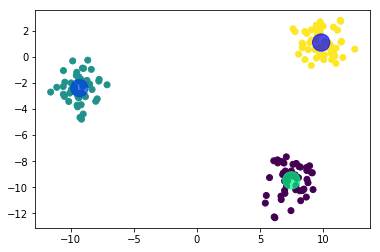

In [22]:
#y_train数据不存在
#无监督学习Kmeans求得了类别：y_
plt.scatter(X_train[:,0],X_train[:,1],c = y_)

cluster_centers_ = kmeans.cluster_centers_

plt.scatter(cluster_centers_[:,0],cluster_centers_[:,1],s = 300,alpha = 0.7,c = [-2,1,2],
            cmap = plt.cm.winter_r)

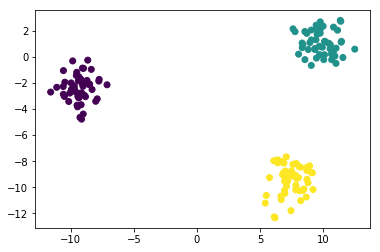

In [14]:
#原始的数据结果：
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

### 2、 实战，三问中国足球几多愁？

导包，3D图像需导包：from mpl_toolkits.mplot3d import Axes3D  
读取数据

In [24]:
from mpl_toolkits.mplot3d import Axes3D

In [25]:
import pandas as pd

from pandas import Series,DataFrame

In [27]:
ball = pd.read_csv('../data/AsiaFootball.txt',header=None)
ball

,0,1,2,3
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


列名修改为："国家","2006世界杯","2010世界杯","2007亚洲杯"

In [28]:
ball.columns = ["国家","2006世界杯","2010世界杯","2007亚洲杯"]
ball

,国家,2006世界杯,2010世界杯,2007亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


使用K-Means进行数据处理，对亚洲球队进行分组，分三组

In [29]:
kmeans = KMeans(3)

In [30]:
kmeans.fit(ball[["2006世界杯","2010世界杯","2007亚洲杯"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
y_ = kmeans.predict(ball[["2006世界杯","2010世界杯","2007亚洲杯"]])
y_

array([0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0], dtype=int32)

for循环打印输出分组后的球队，argwhere()

In [33]:
np.argwhere(y_ == 1)

array([[1],
       [2]])

In [36]:
for i in range(3):
    
    index = np.argwhere(y_ == i)
    
    for i, in index:
        print(ball['国家'][i],end = ' ')
    print('\n')

中国 伊拉克 卡塔尔 阿联酋 泰国 越南 阿曼 印尼 

日本 韩国 

伊朗 沙特 乌兹别克斯坦 巴林 朝鲜 



绘制三维立体图形,ax = plt.subplot(projection  = '3d')  
ax.scatter3D()

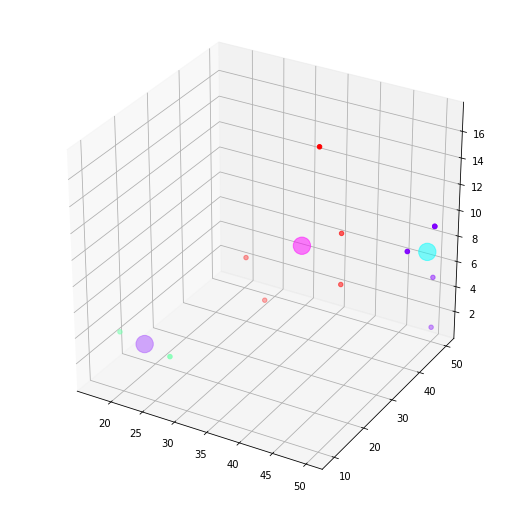

In [40]:
plt.figure(figsize=(9,9))
axes3d = plt.subplot(projection = '3d')

axes3d.scatter3D(ball['2006世界杯'],ball['2010世界杯'],ball['2007亚洲杯'],c = y_,cmap = 'rainbow')

cluster_centers_ = kmeans.cluster_centers_

axes3d.scatter3D(cluster_centers_[:,0],cluster_centers_[:,1],cluster_centers_[:,2],
                 c = [-1,3,5],cmap = plt.cm.cool,s = 300,alpha = 0.5)

### 3、聚类实践与常见错误

导包，使用make_blobs创建样本点

第一种错误，k值不合适，make_blobs默认中心点三个

第二种错误,数据偏差  
trans = [[0.6,-0.6],[-0.4,0.8]]  
X2 = np.dot(X,trans)

第三个错误:标准偏差不相同cluster_std

第四个错误：样本数量不同

### 4、K-Means图片颜色点分类

导包from sklearn.metrics import pairwise_distances_argmin

加载图片/创建模型/训练数据/获取labels

使用pairwise_distances_argmin算法生成随机labels

创造方法，重新合成图片

数据可视化

## 三、作业

### 1、分析ex7data2.mat文件

找出最佳聚类数目，并画出聚类的中心点

`
from scipy.io import loadmat
from sklearn.cluster import KMeans
data = loadmat('../data/ex7data2.mat')
X = data['X']
X.shape
`

### 2、图片压缩

使用聚类压缩图片

`
img = plt.imread('../data/bird_small.png')
img_shape = img.shape
img_shape
`